In [1]:
# Import dependencies
import requests
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read files into DataFrame
path_conflict = Path("conflict_data.csv")
conflict_df = pd.read_csv(path_conflict)

path_migration = Path("net_migration.csv")
migration_df = pd.read_csv(path_migration)

path_population = Path("population(1).csv")
population_df = pd.read_csv(path_population)

In [3]:
conflict_df.head()
conflict_df.tail()

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate
6965,Zimbabwe,ZWE,2018,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0
6969,Zimbabwe,ZWE,2022,0,0,0,0


In [4]:
migration_df.head()

,Country name,Year,Net migration
0,Afghanistan,1950,6161.0
1,Afghanistan,1951,4903.0
2,Afghanistan,1952,145.0
3,Afghanistan,1953,-8867.0
4,Afghanistan,1954,-6837.0


In [5]:
population_df.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,population__all__50_54__records,population__all__55_59__records,population__all__60_64__records,population__all__65_69__records,population__all__70_74__records,population__all__75_79__records,population__all__80_84__records,population__all__85_89__records,population__all__90_94__records,population__all__95_99__records
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,255563,211607,161196,110709,64310,28381,8153,1346,115,8
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,256915,211966,161821,111465,65210,29148,8672,1483,109,9
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,258952,211946,162710,112142,66123,29903,9137,1584,129,10
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,261238,211731,163777,112800,67058,30647,9561,1693,155,11
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,263301,211816,164736,113474,67953,31345,9963,1830,179,11


In [6]:
# Clean up Population Table to just country, year, and pop
selected_columns = population_df[["Country name", "Year", "Population"]]
population_only_df = pd.DataFrame(selected_columns)
population_only_df.head()

,Country name,Year,Population
0,Afghanistan,1950,7480464
1,Afghanistan,1951,7571542
2,Afghanistan,1952,7667534
3,Afghanistan,1953,7764549
4,Afghanistan,1954,7864289


In [7]:
conflict_df.head()

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate
0,Abkhazia,OWID_ABK,1989,0,0,0,0
1,Abkhazia,OWID_ABK,1990,0,0,0,0
2,Abkhazia,OWID_ABK,1991,0,0,0,0
3,Abkhazia,OWID_ABK,1992,0,0,0,0
4,Abkhazia,OWID_ABK,1993,0,0,0,0


In [8]:
# Create a new column with total deaths.
conflict_df["total_conflict_deaths"] = conflict_df[["One-sided violence", "Non-state", "Intrastate", "Interstate"]].sum(axis=1)
conflict_df

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0,0,0,0,0
1,Abkhazia,OWID_ABK,1990,0,0,0,0,0
2,Abkhazia,OWID_ABK,1991,0,0,0,0,0
3,Abkhazia,OWID_ABK,1992,0,0,0,0,0
4,Abkhazia,OWID_ABK,1993,0,0,0,0,0
...,...,...,...,...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0,0


In [9]:
# Remove all conflicts except total.
conflict_df.drop(["One-sided violence", "Non-state", "Intrastate", "Interstate"], axis=1, inplace=True)
conflict_df


,Entity,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0
...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0
6966,Zimbabwe,ZWE,2019,0
6967,Zimbabwe,ZWE,2020,0
6968,Zimbabwe,ZWE,2021,0


In [10]:
# Rename 'Entity' column in conflict_df to 'country name'
conflict_df.rename(columns={'Entity': 'Country name'}, inplace=True)
conflict_df.head()

,Country name,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0


In [11]:
# Merge conflict_df and migration_df on 'country_name' and 'year'
merged_df = pd.merge(conflict_df, migration_df, on=['Country name', 'Year'], how='outer')
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration
0,Abkhazia,OWID_ABK,1989,0.0,NaN
1,Abkhazia,OWID_ABK,1990,0.0,NaN
2,Abkhazia,OWID_ABK,1991,0.0,NaN
3,Abkhazia,OWID_ABK,1992,0.0,NaN
4,Abkhazia,OWID_ABK,1993,0.0,NaN


In [12]:
# Merge the resulting DataFrame with population_df on 'country_name' and 'year'
merged_df = pd.merge(merged_df, population_only_df, on=['Country name', 'Year'], how='outer')
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration,Population
0,Abkhazia,OWID_ABK,1989,0.0,NaN,NaN
1,Abkhazia,OWID_ABK,1990,0.0,NaN,NaN
2,Abkhazia,OWID_ABK,1991,0.0,NaN,NaN
3,Abkhazia,OWID_ABK,1992,0.0,NaN,NaN
4,Abkhazia,OWID_ABK,1993,0.0,NaN,NaN


In [13]:
# Remove any NaNs from the dataset.
merged_df.dropna(how="any", inplace=True)
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration,Population
34,Afghanistan,AFG,1989,5411.0,2683.0,10673172.0
35,Afghanistan,AFG,1990,1514.0,-666001.0,10694804.0
36,Afghanistan,AFG,1991,3553.0,39926.0,10745168.0
37,Afghanistan,AFG,1992,4366.0,1834556.0,12057436.0
38,Afghanistan,AFG,1993,4097.0,1171818.0,14003764.0


In [14]:
# Remove Code column
merged_df.drop(["Code"], axis=1, inplace=True)
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
34,Afghanistan,1989,5411.0,2683.0,10673172.0
35,Afghanistan,1990,1514.0,-666001.0,10694804.0
36,Afghanistan,1991,3553.0,39926.0,10745168.0
37,Afghanistan,1992,4366.0,1834556.0,12057436.0
38,Afghanistan,1993,4097.0,1171818.0,14003764.0


In [15]:
# Reset Index
merged_df.reset_index(drop=True, inplace=True)
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Afghanistan,1989,5411.0,2683.0,10673172.0
1,Afghanistan,1990,1514.0,-666001.0,10694804.0
2,Afghanistan,1991,3553.0,39926.0,10745168.0
3,Afghanistan,1992,4366.0,1834556.0,12057436.0
4,Afghanistan,1993,4097.0,1171818.0,14003764.0


In [16]:
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Afghanistan,1989,5411.0,2683.0,10673172.0
1,Afghanistan,1990,1514.0,-666001.0,10694804.0
2,Afghanistan,1991,3553.0,39926.0,10745168.0
3,Afghanistan,1992,4366.0,1834556.0,12057436.0
4,Afghanistan,1993,4097.0,1171818.0,14003764.0


In [17]:
# list all Asian countries
asian_countries = ["Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar (Burma)", "Nepal", "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", "Taiwan", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"]


In [18]:
# Create Asian dataframe
asia_df = merged_df[merged_df['Country name'].isin(asian_countries)]
asia_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Afghanistan,1989,5411.0,2683.0,10673172.0
1,Afghanistan,1990,1514.0,-666001.0,10694804.0
2,Afghanistan,1991,3553.0,39926.0,10745168.0
3,Afghanistan,1992,4366.0,1834556.0,12057436.0
4,Afghanistan,1993,4097.0,1171818.0,14003764.0


In [20]:
# Drop Country Name and rename df
asia_df.drop(["Country name"], axis=1, inplace=True)

/var/folders/mb/tkslq47j2z1c1fkcck3v1pyr0000gn/T/ipykernel_57316/575889930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_df.drop(["Country name"], axis=1, inplace=True)


In [21]:
asia_df

,Year,total_conflict_deaths,Net migration,Population
0,1989,5411.0,2683.0,10673172.0
1,1990,1514.0,-666001.0,10694804.0
2,1991,3553.0,39926.0,10745168.0
3,1992,4366.0,1834556.0,12057436.0
4,1993,4097.0,1171818.0,14003764.0
...,...,...,...,...
6463,2017,3347.0,-39672.0,30034386.0
6464,2018,4839.0,-39699.0,30790514.0
6465,2019,2821.0,-39769.0,31546694.0
6466,2020,6712.0,-86100.0,32284044.0


In [22]:
asia_clean_df = asia_df.groupby("Year").agg({"total_conflict_deaths": "sum", "Net migration": "sum", "Population": "sum"}).reset_index()
asia_clean_df

,Year,total_conflict_deaths,Net migration,Population
0,1989,15369.0,-5.260580e+05,3.104161e+09
1,1990,18169.0,-1.298372e+06,3.164306e+09
2,1991,41978.0,-9.668340e+05,3.222114e+09
3,1992,24811.0,-1.181023e+06,3.276786e+09
4,1993,16860.0,-1.619410e+06,3.330007e+09
5,1994,20895.0,-1.377604e+06,3.382314e+09
6,1995,17930.0,-1.739402e+06,3.433839e+09
7,1996,17855.0,-1.470802e+06,3.484432e+09
8,1997,17507.0,-1.361735e+06,3.534427e+09
9,1998,21381.0,-1.161433e+06,3.584021e+09


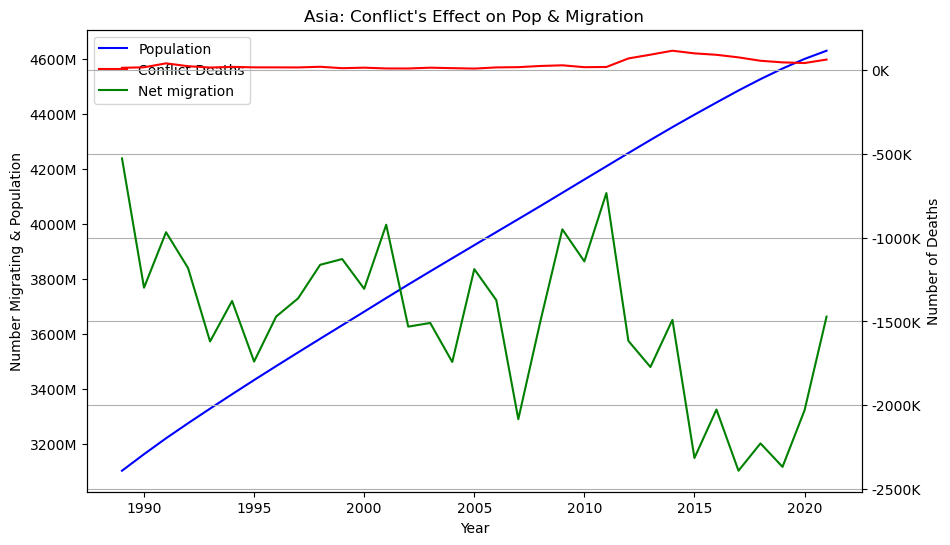

In [23]:
def millions(x, pos):
    return f"{x*1e-6:1.0f}M"

def thousand(x, pos):
    return f"{x*1e-3:1.0f}K"

# Create graph for lines to go on
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  

# Set y-axis formatters
ax1.yaxis.set_major_formatter(millions)
ax2.yaxis.set_major_formatter(thousand)

# Plot data
ax2.plot(asia_clean_df['Year'], asia_clean_df['total_conflict_deaths'], label="Conflict Deaths", color="red")
ax1.plot(asia_clean_df['Year'], asia_clean_df['Population'], label="Population", color="blue")
ax2.plot(asia_clean_df['Year'], asia_clean_df["Net migration"], label="Net migration", color="green")

# Clean up Graph
ax1.set_xlabel("Year")
ax1.set_ylabel('Number Migrating & Population')
ax2.set_ylabel('Number of Deaths')
plt.title("Asia: Conflict's Effect on Pop & Migration")
ax2.grid(True)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.show()

In [24]:
asia_clean_df.corr()

,Year,total_conflict_deaths,Net migration,Population
Year,1.000000,0.645069,-0.591178,0.999367
total_conflict_deaths,0.645069,1.000000,-0.520906,0.641108
Net migration,-0.591178,-0.520906,1.000000,-0.590598
Population,0.999367,0.641108,-0.590598,1.000000
